<a href="https://colab.research.google.com/github/ummuhantk/Linear_Regression_K-means_Clustering/blob/main/Linear_Regression_K_means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#yaşlara göre bilinen kelime sayısı chatgpt ye örnek veri seti oluşturuldu.
#Öğrenme amaçlı gerçek olmayan örnek veri seti ile çalışıldı.

In [ ]:
%pip install pandas

In [ ]:
import pandas as pd


In [ ]:
nun_verisi = pd.read_csv("yas_kelime.csv")
nun_verisi

,yas,kelime
0,0-1,10
1,1-2,50
2,2-3,150
3,3-4,300
4,4-5,500
5,5-6,800
6,6-7,1200
7,7-8,1800
8,8-9,2500
9,9-10,3000


In [ ]:
%pip install matplotlib

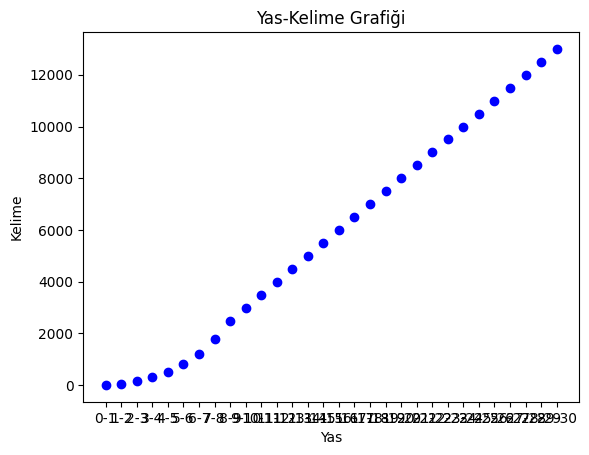

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(nun_verisi["yas"], nun_verisi["kelime"], color="blue")
plt.xlabel("Yas")
plt.ylabel("Kelime")
plt.title("Yas-Kelime Grafiği")
plt.show()

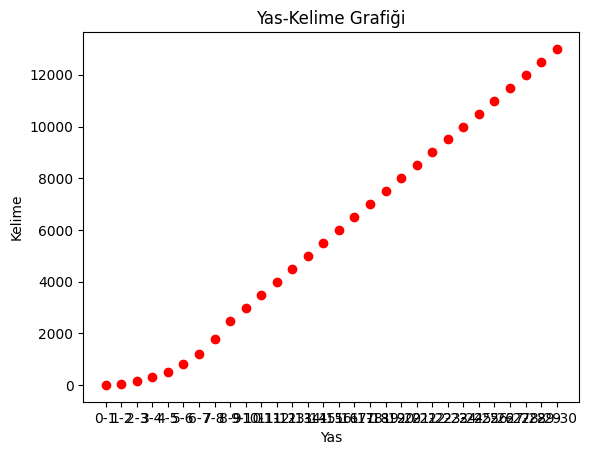

In [ ]:
plt.scatter(nun_verisi["yas"], nun_verisi["kelime"], color="red")
plt.xlabel("Yas")
plt.ylabel("Kelime")
plt.title("Yas-Kelime Grafiği")
plt.show()

In [ ]:
a = 5
b = 50

def yas_tahmini(kelime):
    return a * kelime + b

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
model.fit([[1], [2], [3], [4]], [5, 9, 13, 17])

LinearRegression()

In [ ]:
def convert_age_range(age_range):
    start, end = map(int, age_range.split('-'))
    return (start + end) / 2  # Yaş aralığının ortalaması

nun_verisi['yas'] = nun_verisi['yas'].apply(convert_age_range)

In [ ]:
model.fit(nun_verisi[["yas"]], nun_verisi["kelime"])

LinearRegression()

In [ ]:
tahmin_edilen_degerler = model.predict(nun_verisi[["yas"]])
tahmin_edilen_degerler

array([-1137.33333333,  -655.88505747,  -174.43678161,   307.01149425,
         788.45977011,  1269.90804598,  1751.35632184,  2232.8045977 ,
        2714.25287356,  3195.70114943,  3677.14942529,  4158.59770115,
        4640.04597701,  5121.49425287,  5602.94252874,  6084.3908046 ,
        6565.83908046,  7047.28735632,  7528.73563218,  8010.18390805,
        8491.63218391,  8973.08045977,  9454.52873563,  9935.97701149,
       10417.42528736, 10898.87356322, 11380.32183908, 11861.77011494,
       12343.2183908 , 12824.66666667])

In [ ]:
model.coef_, model.intercept_

(array([481.44827586]), -1378.0574712643647)

In [ ]:
model.predict([[1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-896.6091954])

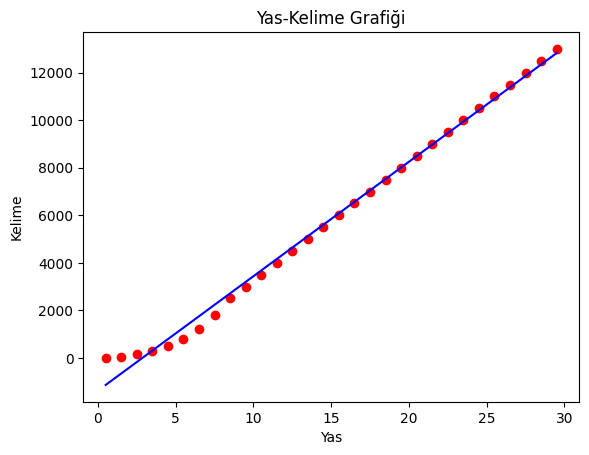

In [ ]:
plt.scatter(nun_verisi["yas"], nun_verisi["kelime"], color="red")
plt.plot(nun_verisi["yas"], tahmin_edilen_degerler, color="blue")
plt.xlabel("Yas")
plt.ylabel("Kelime")
plt.title("Yas-Kelime Grafiği")
plt.show()

In [ ]:
yirmi_yaşındaki_kişi = model.predict([[12]])
yirmi_yaşındaki_kişi

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([4399.32183908])

In [ ]:
nun_verisi.head(30).tail(10)

,yas,kelime
20,20.5,8500
21,21.5,9000
22,22.5,9500
23,23.5,10000
24,24.5,10500
25,25.5,11000
26,26.5,11500
27,27.5,12000
28,28.5,12500
29,29.5,13000


In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
kmeans.fit(nun_verisi[['yas', 'kelime']])
nun_verisi['küme'] = kmeans.predict(nun_verisi[['yas', 'kelime']])
nun_verisi

,yas,kelime,küme
0,0.5,10,1
1,1.5,50,1
2,2.5,150,1
3,3.5,300,1
4,4.5,500,1
5,5.5,800,1
6,6.5,1200,1
7,7.5,1800,3
8,8.5,2500,3
9,9.5,3000,3


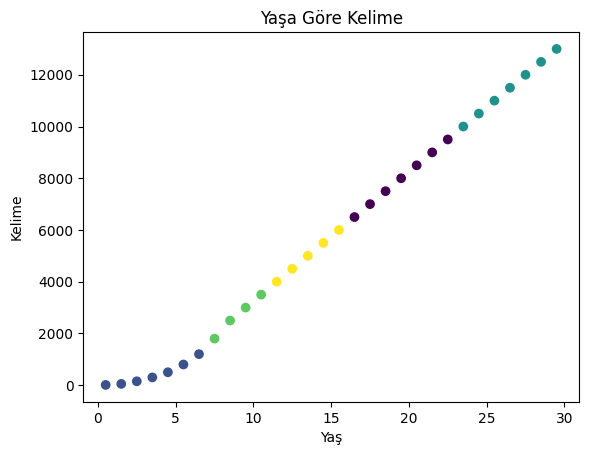

In [ ]:
plt.scatter(nun_verisi['yas'], nun_verisi['kelime'], c=nun_verisi['küme'])
plt.xlabel('Yaş')
plt.ylabel('Kelime')
plt.title('Yaşa Göre Kelime')
plt.show()